In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import tensorflow.keras.layers as L
from matplotlib import pyplot as plt
from PIL import Image as img

import os

from os import listdir
from os.path import isfile, join

from IPython import display

from stylegan2 import StyleGAN2

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
tf.version.VERSION

'2.2.0'

In [3]:
class DataLoader():
    def __init__(self, image_size, batch_size, source_folder = 'C:\\art\\resized_512\\'):
        self.batch_size = batch_size
        self.image_size = image_size
        self.dataset = source_folder
        self.images = list(os.listdir(self.dataset))
        print("Number of images in the dataset:", len(self.images))
        
    def get_batch(self):
        batch = np.zeros((self.batch_size, self.image_size, self.image_size, 3), dtype = np.float32)
        for b in range(self.batch_size):
            try:
                l = np.random.randint(len(self.images))
                im = img.open(self.dataset + self.images[l]).convert('RGB')
                h, w = im.size
                if h > 512:
                    ww = 0
                    hh = np.random.randint(h - 512)
                elif w > 512:
                    ww = np.random.randint(w - 512)
                    hh = 0
                else:
                    ww, hh = 0, 0
                if np.random.rand() > 0.5:
                    im = im.transpose(method=img.FLIP_LEFT_RIGHT)
                im = im.crop((hh, ww, hh + 512, ww + 512))
                im = im.resize((self.image_size, self.image_size))
                im = np.array(im, dtype = np.float32)
                batch[b, :, :, :] = im[None, :self.image_size, :self.image_size, :] / 255.0
            except:
                print("Could not open image:", self.dataset + self.images[l])
        return batch

In [4]:
d = DataLoader(gan.image_size, gan.batch_size, source_folder = 'C:\\art\\resized_512_landscape\\')

NameError: name 'gan' is not defined

In [ ]:
plt.imshow(d.get_batch()[0])

In [5]:
gan = StyleGAN2(image_size = 256, batch_size = 8, lr = 1e-4)

In [6]:
gan.data_loader = DataLoader(gan.image_size, gan.batch_size, source_folder = 'C:\\art\\resized_512_landscape\\')

Number of images in the dataset: 15000


In [18]:
gan.loadWeights(suffix = "_landscape")

In [25]:
gan.train(1000000)

Could not open image: C:\art\resized_512_landscape\11150-Landscape with Three Figures and Willow.jpg


KeyboardInterrupt: 

(-1, 10)

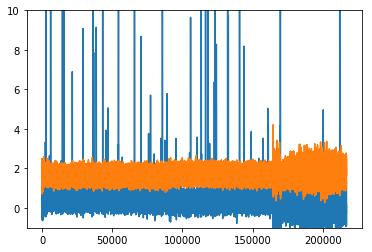

In [19]:
plt.plot(gan.history['G'])
plt.plot(gan.history['D'])
plt.ylim([-1,10])

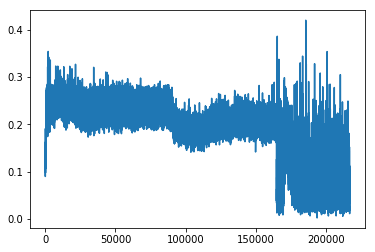

In [20]:
plt.plot(gan.history['R1'])

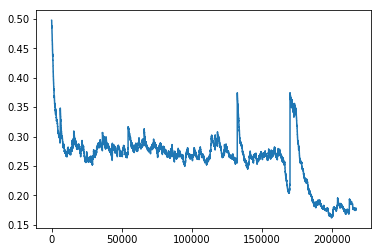

In [21]:
plt.plot(gan.history['pl'])

In [22]:
gan.saveWeights(suffix = "_landscape")

In [23]:
gan.step

216929

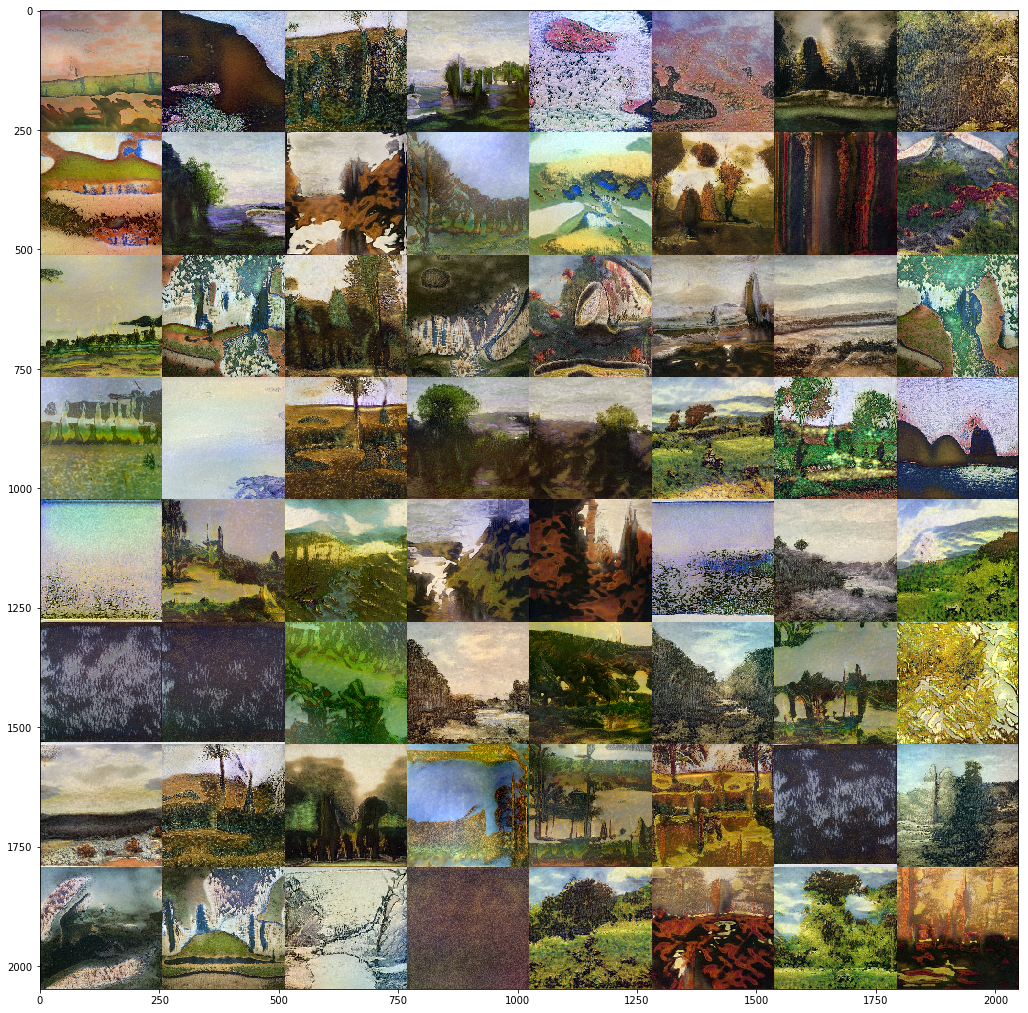

In [27]:
b = gan.batch_size
collage = np.zeros((256 * b, 256 * b, 3))
for i in range(b):
    data = np.clip(gan.generate().numpy(), 0, 1)
    data = np.reshape(data, (256 * b, 256, 3))
    collage[:, 256 * i: 256 * (i + 1), :] = data
plt.figure(figsize = (18, 18))
plt.imshow(collage)

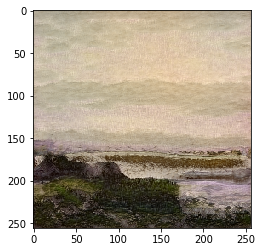

In [35]:
plt.imshow(np.clip(gan.generate().numpy()[0], 0, 1))